# **Ideal Gas Behavior: Pressure and Temperature Range for CClF₃**

### **Objective:**

-   I want to evaluate under which pressure and temperature conditions I can assume CCLF3 gas to behave like an ideal gas. 


### **Approach:**
I will use the **Peng–Robinson Equation of State (PR EOS)** to compute the **volume \( $v_{m}$ \)** and the **compressibility factor** \( $Z$ \), defined as:

$$
Z = \frac{P v_m}{R T}
$$

Where:
- \( Z \): compressibility factor  
- \( P \): pressure (Pa)  
- \( v_m \): molar volume (m³/mol)  
- \( R \): universal gas constant (J/mol·K)  
- \( T \): temperature (K)  



### **Peng–Robinson EOS (VExplicit)**

$$
v_m^3 + (b - \frac{R T}{P}) v_m^2 + \left( \frac{a \alpha}{P} - 3b^2 - 2b \frac{R T}{P} \right) v_m + \left( b^3 + \frac{b^2 R T - a \alpha b}{P} \right) = 0
$$


With parameters:

- $a = 0.45724 \dfrac{R^2 T_c^2}{P_c}$
- $b = 0.07780 \dfrac{R T_c}{P_c}$
- $\kappa = 0.37464 + 1.54226 \omega - 0.26992 \omega^2$
- $\alpha = \left[ 1 + \kappa \left( 1 - \sqrt{\dfrac{T}{T_c}} \right) \right]^2$


_

### **Ideal Gas Validity Criterion**

I will assume **ideal gas behavior** is valid when the compressibility factor satisfies:

$$
|Z - 1| \leq 0.025
$$

This means the gas deviates less than 2.5% from ideal behavior. The region where this condition holds is identified as the **"ideal gas zone"** in the pressure–temperature plot.

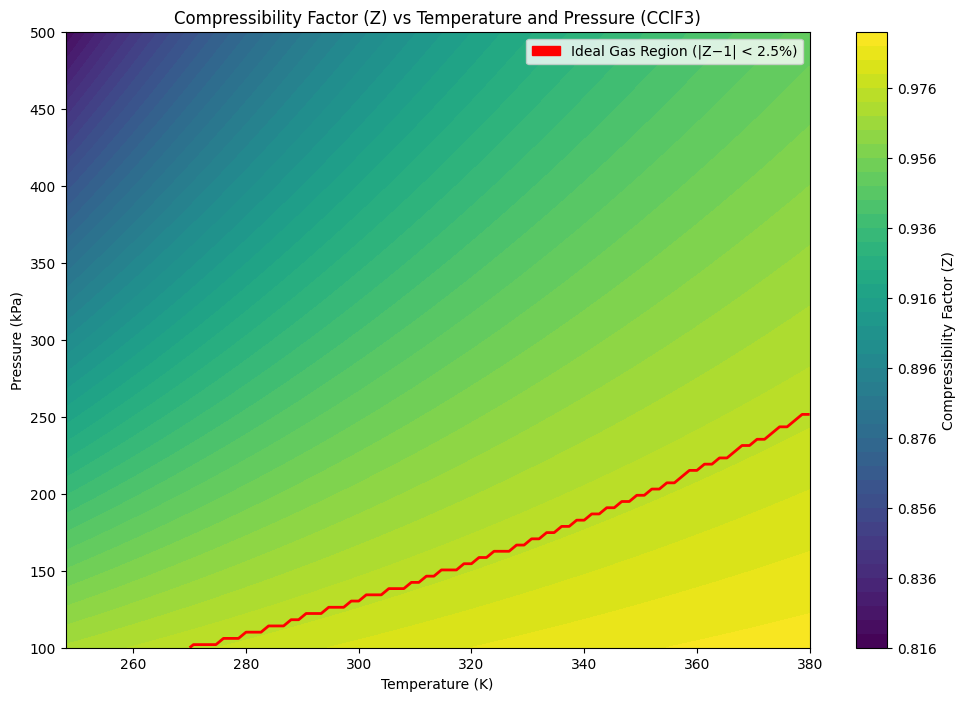

In [33]:
# Libraries
import scipy
import numpy as np
from EOS_module import EOS
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Peng Robinson coefficients
Tc = 302.05
Pc = 3879 *1000 
ω = 0.1723 
R = scipy.constants.R

# Temperature and Pressure ranges
T_min, Tmax = 273 + -25, 273 + 107           # Temperature range for this refrigerant
T_range = np.linspace(T_min, Tmax, 100) 
P_min, P_max = 1 *100000, 5 *100000      
P_range = np.linspace(P_min, P_max, 100) 

# T and P vs Compressibility Factor (Z) 
grid_x, grid_y = np.meshgrid(T_range, P_range)
Z_values = np.zeros((len(P_range), len(T_range)))
for i, P in enumerate(P_range):
    for j, T in enumerate(T_range):
        v_gas, _ = EOS().peng_robinson_vexp(T, P, Tc, Pc, ω) 
        Z = (P * v_gas) / (R * T)  
        Z_values[i, j] = Z

# Now, I will assume that the ideal gas law is valid for Z values deviating less than 2.5% from 1."
threshold = 0.025 # 
ideal_zone = (Z_values>(1 - threshold)) & (Z_values < (1 + threshold)) 

# Plot 
plt.figure(figsize=(12, 8))
plt.contourf(grid_x, grid_y/1000, Z_values, levels=50, cmap='viridis') 
plt.colorbar(label='Compressibility Factor (Z)') 
plt.contour(grid_x, grid_y / 1000, ideal_zone, levels=[0.5], colors='red', linewidths=2)
plt.title('Compressibility Factor (Z) vs Temperature and Pressure (CClF3)')
plt.legend(handles=[mpatches.Patch(color='red', label='Ideal Gas Region (|Z−1| < 2.5%)')])
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (kPa)') 
plt.savefig('Images/GTP3_Compressibility_Factor_CClF3.png', dpi=300) 
plt.show() 

**Comments on the P-T vs Z Figure:**

Basically, any expansion or compression process that happens below the red line may be assumed to behave like an ideal gas. However, phase change calculations must also be considered when evaluating the process modeling.